# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver e inclua o parâmetro decimal ',' para o pandas identificar os números corretamente

### Import dos módulos e leitura dos dataframes

In [1]:
import pandas as pd

In [21]:
#Importando as bases
df_base_servicos = pd.read_excel(r'files/BaseServiçosPrestados.xlsx')
df_cadastro_clientes = pd.read_csv(r'files/CadastroClientes.csv', sep=';')
df_cadastro_funcionarios = pd.read_csv(r'files/CadastroFuncionarios.csv', sep=';', decimal=',')

In [22]:
#Selecionado as colunas necessárias
df_cadastro_funcionarios = df_cadastro_funcionarios.drop(['Estado Civil', 'Cargo'], axis=1)

### 1 - Folha Salarial
Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

In [23]:
df_cadastro_funcionarios['Salario Total'] = df_cadastro_funcionarios['Salario Base'] + df_cadastro_funcionarios['Impostos']  \
                                            + df_cadastro_funcionarios['Beneficios'] + df_cadastro_funcionarios['VT'] \
                                            + df_cadastro_funcionarios['VR']

total_gasto = df_cadastro_funcionarios['Salario Total'].sum()
print('O total da folha mensal é de: R$ {:,}'.format( total_gasto))


O total da folha mensal é de: R$ 2,717,493.22


### 2 - Faturamento da empresa
Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

In [34]:
#Join dos dataframes selecionando as colunas necessárias
df_faturamento = df_base_servicos[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(df_cadastro_clientes[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')

#Cálcula o faturamento por serviço e cliente
df_faturamento['Total Faturamento'] = df_faturamento['Tempo Total de Contrato (Meses)'] * df_faturamento['Valor Contrato Mensal']

#Calcula o total faturado
total_faturado = df_faturamento['Total Faturamento'].sum()

#Exibe o total faturado
print('O total faturado foi de: R$ {:,}'.format(total_faturado))


O total faturado foi de: R$ 5,519,160


In [50]:
funcionarios_servicos_fechados = df_base_servicos['ID Funcionário'].nunique()
total_funcionarios = df_cadastro_funcionarios['ID Funcionário'].nunique()
percentual = funcionarios_servicos_fechados / total_funcionarios

print('O percentual foi de {:.2%}'.format(percentual))


O percentual foi de 86.84%


Outra proposta, seria: 

In [51]:
funcionarios_servicos_fechados = len(df_base_servicos['ID Funcionário'].unique())
total_funcionarios = len(df_cadastro_funcionarios['ID Funcionário'].unique())
percentual = funcionarios_servicos_fechados / total_funcionarios

print('O percentual foi de {:.2%}'.format(percentual))

O percentual foi de 86.84%


### 4 - Calculando o total de contratos que cada área da empresa já fechou

In [66]:
df_area = df_base_servicos[['ID Funcionário']].merge(df_cadastro_funcionarios[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_por_area_df = df_area.value_counts()
contratos_por_area_df


ID Funcionário  Area          
47              Operações         6
37              Financeiro        5
84              Logística         5
4               Administrativo    5
54              Administrativo    4
                                 ..
79              Operações         1
85              Operações         1
93              Financeiro        1
99              Administrativo    1
150             Comercial         1
Length: 99, dtype: int64

### 5 - Calculando o total de funcionários por área

In [73]:
funcionarios_area_df = df_cadastro_funcionarios[['ID Funcionário', 'Area']]
funcionarios_area_df.groupby('Area').count()

,ID Funcionário
Area,
Administrativo,26
Comercial,26
Financeiro,18
Logística,21
Operações,23


Outra proposta

<AxesSubplot:>

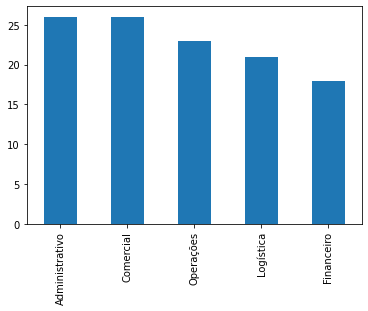

In [75]:
funcionarios_area_df = df_cadastro_funcionarios['Area'].value_counts()
funcionarios_area_df
funcionarios_area_df.plot(kind='bar')

### 6 - Ticket Médio Mensal
Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

In [79]:
ticket_medio = df_cadastro_clientes['Valor Contrato Mensal'].mean()
print('O ticket médio mensal é de R$ {:,.2f}'.format(ticket_medio))

O ticket médio mensal é de R$ 2,502.56
